# Introduction
The scope of this project is to calculate the difference between survey date, and urgent and non-urgent appointments for providers contracted with Kentucky Medicaid.

Providers contracted with Kentucky Medicaid are expected to provide access to care standards and processes for ongoing monitoring of access to health care by following certain medical appointments standard, such as **urgent appointments within 48 hours** and **non-urgent appointments within 30 calendar days**. The dataset includes urgent and non-urgent appointments provided by contracted primary care providers (PCP - adult and pediatrics) and OB/GYN.[1]

The survey was conducted by vendor and provided with the data collected for providers that are contracted with Kentucky Medicaid. The survey was conducted between February 15 to March 24, 2022. The survey was conducted to collect the first available urgent and non-urgent appointment date and time.

Please note, the data used in this project is hypothetical and was generated using the Python program.

Source:
[1] https://www.molinahealthcare.com/providers/ky/medicaid/resource/access_avail.aspx

This program will analyze the data and answer the following questions:

Analyze data to answer questions:
* Days between survey and urgent appointment. If over 48 hours: Not compliant
* Days between survey and non-urgent appointment. If over 30 calendar days: Not complaint.
* Check if survey was completed on weekend (Saturday or Sunday). If yes, survey not valid.

Display analyzed data in charts:
* Percent compliant and non-compliant
* By provider type/ by county

# Import Required Libraries.
Python libraries needed to run this program on your computer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt

# Import CSV file and preview data.

In [2]:
survey_data = pd.read_csv('provider_appt_final.csv')

# Print columns and remove white space, if any.

In [3]:
# print column names to check white space, if any.

list(survey_data.columns)

['NPI',
 'First_Name',
 'Last_Name',
 'License_Number',
 'Network',
 'Address',
 'City',
 'County',
 'State',
 'Zip_Code ',
 'Phone_Number',
 'Fax_Number',
 'Specialty ',
 'Date_Survey',
 'Time_Survey',
 'Urgent_Appointment_Date ',
 'Urgent_Appointment_Time',
 'Non_Urgent_Appointment_Date',
 ' Non_Urgent_Appointment_Time']

In [4]:
# Remove columns/headers white spaces.

survey_data.columns = survey_data.columns.str.strip()

In [5]:
# Checking columns name to see if white spaces are still present.

list(survey_data.columns)

['NPI',
 'First_Name',
 'Last_Name',
 'License_Number',
 'Network',
 'Address',
 'City',
 'County',
 'State',
 'Zip_Code',
 'Phone_Number',
 'Fax_Number',
 'Specialty',
 'Date_Survey',
 'Time_Survey',
 'Urgent_Appointment_Date',
 'Urgent_Appointment_Time',
 'Non_Urgent_Appointment_Date',
 'Non_Urgent_Appointment_Time']

# Data formatting and cleaning.

In [6]:
# Preview Data.

survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,Phone_Number,Fax_Number,Specialty,Date_Survey,Time_Survey,Urgent_Appointment_Date,Urgent_Appointment_Time,Non_Urgent_Appointment_Date,Non_Urgent_Appointment_Time
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,2708870100,2708831000,Internal Medicine,3/3/22,8:00 AM,3/7/22,1:00 PM,4/18/22,8:45 AM
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,2707264011,2707242300,General Practice,2/18/22,2:30 PM,3/4/22,1:30 PM,4/4/22,7:00 AM
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,2702421100,2702481212,Pediatrics,2/18/22,10:30 AM,3/16/22,7:00 AM,3/14/22,1:00 PM
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,2707371212,2707342511,General Practice,2/21/22,7:30 AM,2/21/22,4:00 PM,3/22/22,8:00 AM
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,2708255100,2708297441,Pediatrics,3/14/22,2:00 PM,3/15/22,3:00 PM,3/28/22,8:45 AM


In [7]:
# Check data types

print(type(survey_data.Date_Survey[0]))
print(type(survey_data.Time_Survey[0]))
print(type(survey_data.Urgent_Appointment_Date[0]))
print(type(survey_data.Urgent_Appointment_Time[0]))
print(type(survey_data.Non_Urgent_Appointment_Date[0]))
print(type(survey_data.Non_Urgent_Appointment_Time[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
# convert the date_str and time_str columns to datetime format
survey_data['Survey_Date'] = pd.to_datetime(survey_data['Date_Survey'])
survey_data['Survey_Time'] = pd.to_datetime(survey_data['Time_Survey']).dt.time

survey_data['Urg_Appt_Date'] = pd.to_datetime(survey_data['Urgent_Appointment_Date'])
survey_data['Urg_Appt_Time'] = pd.to_datetime(survey_data['Urgent_Appointment_Time']).dt.time

survey_data['Non_Urg_Appt_Date'] = pd.to_datetime(survey_data['Non_Urgent_Appointment_Date'])
survey_data['Non_Urg_Appt_Time'] = pd.to_datetime(survey_data['Non_Urgent_Appointment_Time']).dt.time

# drop the original date and time columns
survey_data.drop('Date_Survey', axis=1, inplace=True)
survey_data.drop('Time_Survey', axis=1, inplace=True)

survey_data.drop('Urgent_Appointment_Date', axis=1, inplace=True)
survey_data.drop('Urgent_Appointment_Time', axis=1, inplace=True)

survey_data.drop('Non_Urgent_Appointment_Date', axis=1, inplace=True)
survey_data.drop('Non_Urgent_Appointment_Time', axis=1, inplace=True)

# print the updated dataframe with columns in datetime format
survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,Phone_Number,Fax_Number,Specialty,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,2708870100,2708831000,Internal Medicine,2022-03-03,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,2707264011,2707242300,General Practice,2022-02-18,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,2702421100,2702481212,Pediatrics,2022-02-18,10:30:00,2022-03-16,07:00:00,2022-03-14,13:00:00
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,2707371212,2707342511,General Practice,2022-02-21,07:30:00,2022-02-21,16:00:00,2022-03-22,08:00:00
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,2708255100,2708297441,Pediatrics,2022-03-14,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00


In [9]:
# check dataframe for null value.

survey_data.isnull().sum()

NPI                  0
First_Name           0
Last_Name            0
License_Number       0
Network              0
Address              0
City                 0
County               0
State                0
Zip_Code             0
Phone_Number         0
Fax_Number           0
Specialty            0
Survey_Date          0
Survey_Time          0
Urg_Appt_Date        0
Urg_Appt_Time        0
Non_Urg_Appt_Date    0
Non_Urg_Appt_Time    0
dtype: int64

# Analyzing Data

## Check if survey was completed on weekend (Saturday or Sunday). If yes, survey not valid.

In [10]:
# Day of Week check.
# An integer representing the day of the week, where Monday is 0 and Sunday is 6.

survey_data['day_of_survey'] = survey_data['Survey_Date'].apply(lambda x: x.weekday())

In [11]:
# Assign day to the integer day of week value.

survey_data['survey_day_of_week'] = survey_data['Survey_Date'].apply(lambda x: x.strftime('%A'))

survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Fax_Number,Specialty,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,2708831000,Internal Medicine,2022-03-03,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,2707242300,General Practice,2022-02-18,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,2702481212,Pediatrics,2022-02-18,10:30:00,2022-03-16,07:00:00,2022-03-14,13:00:00,4,Friday
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,2707342511,General Practice,2022-02-21,07:30:00,2022-02-21,16:00:00,2022-03-22,08:00:00,0,Monday
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,2708297441,Pediatrics,2022-03-14,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,0,Monday


In [12]:
# Check if survey day is on weekend. If survey day is on weekend then invalid.

survey_days = survey_data['survey_day_of_week'].unique()
print(survey_days)

['Thursday' 'Friday' 'Monday' 'Wednesday' 'Tuesday']


## Calculate Difference in Days Between Survey and Appointments
- Days between survey and urgent appointment. **If over 48 hours: Not compliant**
    - Calculate the difference in hours between survey time and urgent appointment time, if day = 2.
- Days between survey and non-urgent appointment. **If over 30 calendar days: Not complaint**

In [13]:
# Convert the time column to time format
survey_data['Survey_Time'] = pd.to_datetime(survey_data['Survey_Time'], format='%H:%M:%S').dt.time
survey_data['Urg_Appt_Time'] = pd.to_datetime(survey_data['Urg_Appt_Time'], format='%H:%M:%S').dt.time

# Difference in days between survey and urgent appointment dates
survey_data['Day_btwn_survey_and_Urg_Appt'] = survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']

# Calculate the difference in hours between survey time and urgent appointment time
survey_data.loc[(survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']).dt.days == 2, 'Time_Difference'] = \
    (pd.to_datetime(survey_data['Urg_Appt_Time'], format='%H:%M:%S') - pd.to_datetime(survey_data['Survey_Time'], format='%H:%M:%S')).astype('timedelta64[h]')

survey_data.loc[(survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']).dt.days == 0, 'Time_Difference'] = \
    (pd.to_datetime(survey_data['Urg_Appt_Time'], format='%H:%M:%S') - pd.to_datetime(survey_data['Survey_Time'], format='%H:%M:%S')).astype('timedelta64[h]')

# Difference in days between survey and non-urgent appointment dates
survey_data['Day_btwn_survey_and_Non_Urg_Appt'] = survey_data['Non_Urg_Appt_Date'] - survey_data['Survey_Date']

survey_data.head(20)

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday,4 days,NaN,46 days
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday,14 days,NaN,45 days
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,10:30:00,2022-03-16,07:00:00,2022-03-14,13:00:00,4,Friday,26 days,NaN,24 days
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,07:30:00,2022-02-21,16:00:00,2022-03-22,08:00:00,0,Monday,0 days,8.0,29 days
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,0,Monday,1 days,NaN,14 days
5,68-9404995,Teresa,Mitchell,027-88-4651,KY Medicaid,07792 Joshua Islands Suite 466,Frankfort,Franklin,Kentucky,40601,...,10:30:00,2022-03-18,08:45:00,2022-03-22,07:30:00,2,Wednesday,2 days,-2.0,6 days
6,32-9443996,Kyle,Tate,055-07-6609,KY Medicaid,2876 Allen Via Suite 166,Bowling Green,Warren,Kentucky,42101,...,15:30:00,2022-03-09,15:00:00,2022-03-25,16:00:00,0,Monday,2 days,-1.0,18 days
7,80-2789328,Renee,Edwards,170-85-1863,KY Medicaid,90764 Eric Gateway,Lexington,Fayette,Kentucky,40509,...,14:00:00,2022-02-25,08:45:00,2022-02-28,14:30:00,3,Thursday,1 days,NaN,4 days
8,54-7026256,Amy,Pierce,758-76-1602,KY Medicaid,23361 Michael Mills Suite 354,Bowling Green,Warren,Kentucky,42101,...,08:00:00,2022-03-21,09:00:00,2022-03-22,09:00:00,0,Monday,0 days,1.0,1 days
9,38-3170980,Patricia,Miller,170-31-5116,KY Medicaid,16683 Lindsey Loop Suite 427,Bowling Green,Warren,Kentucky,42101,...,13:00:00,2022-03-07,14:00:00,2022-04-18,08:00:00,4,Friday,17 days,NaN,59 days


## Check 'Compliant' or 'Not Compliant' Based on Above Calculation.

In [14]:
# Check compliance for urgent appointments
survey_data.loc[survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days < 2, 'Urg_Appt_Status'] = 'Compliant'
survey_data.loc[(survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days == 2) & (survey_data['Time_Difference'] < 0), 'Urg_Appt_Status'] = 'Compliant'
survey_data.loc[(survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days == 2) & (survey_data['Time_Difference'] >= 0), 'Urg_Appt_Status'] = 'Not Compliant'
survey_data.loc[survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days > 2, 'Urg_Appt_Status'] = 'Not Compliant'
survey_data.loc[(survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days == 0) & (survey_data['Time_Difference'] < 0), 'Urg_Appt_Status'] = 'Need Review'

# Check compliance for non-urgent appointments
survey_data.loc[survey_data['Day_btwn_survey_and_Non_Urg_Appt'].dt.days <= 30, 'Non_Urg_Appt_Status'] = 'Compliant'
survey_data.loc[survey_data['Day_btwn_survey_and_Non_Urg_Appt'].dt.days > 30, 'Non_Urg_Appt_Status'] = 'Not Compliant'


In [15]:
# display only the columns with difference in days and compliance calculation to verify a few rows visually.

last_5_cols = survey_data.iloc[:, 13:]
last_5_cols.head(20)

,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt,Urg_Appt_Status,Non_Urg_Appt_Status
0,2022-03-03,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday,4 days,NaN,46 days,Not Compliant,Not Compliant
1,2022-02-18,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday,14 days,NaN,45 days,Not Compliant,Not Compliant
2,2022-02-18,10:30:00,2022-03-16,07:00:00,2022-03-14,13:00:00,4,Friday,26 days,NaN,24 days,Not Compliant,Compliant
3,2022-02-21,07:30:00,2022-02-21,16:00:00,2022-03-22,08:00:00,0,Monday,0 days,8.0,29 days,Compliant,Compliant
4,2022-03-14,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,0,Monday,1 days,NaN,14 days,Compliant,Compliant
5,2022-03-16,10:30:00,2022-03-18,08:45:00,2022-03-22,07:30:00,2,Wednesday,2 days,-2.0,6 days,Compliant,Compliant
6,2022-03-07,15:30:00,2022-03-09,15:00:00,2022-03-25,16:00:00,0,Monday,2 days,-1.0,18 days,Compliant,Compliant
7,2022-02-24,14:00:00,2022-02-25,08:45:00,2022-02-28,14:30:00,3,Thursday,1 days,NaN,4 days,Compliant,Compliant
8,2022-03-21,08:00:00,2022-03-21,09:00:00,2022-03-22,09:00:00,0,Monday,0 days,1.0,1 days,Compliant,Compliant
9,2022-02-18,13:00:00,2022-03-07,14:00:00,2022-04-18,08:00:00,4,Friday,17 days,NaN,59 days,Not Compliant,Not Compliant


# Data Check
- Check **Urg_Appt_Time** is after **Survey_Time** Where Appointment is on the Same Day.
- This should not return any row. If any row returned, invaid data.

In [16]:
# Output rows where Urgent Appointment Status = "Need Review"
filtered_df = survey_data[survey_data['Urg_Appt_Status'] == 'Need Review']

# display the filtered dataframe
#filtered_df.head()

last_15_cols = filtered_df.iloc[:, 13:]
last_15_cols.head(20)

,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt,Urg_Appt_Status,Non_Urg_Appt_Status


# Graphs

## Compliance and Non-Compliance Rate by County and Appointment Type
### Line Graph displaying Urgent and Non-urgent Compliance Rate by County.
In the below code:
- counting the number of **Compliant** and **Not Compliant** appointments by county and appointment types.
- calculate the percentage of **Compliant** and **Not Compliant** appointments.
- create the line graph for **Compliant** and **Not Compliant** appointments by appointment types and add prercentage labels.

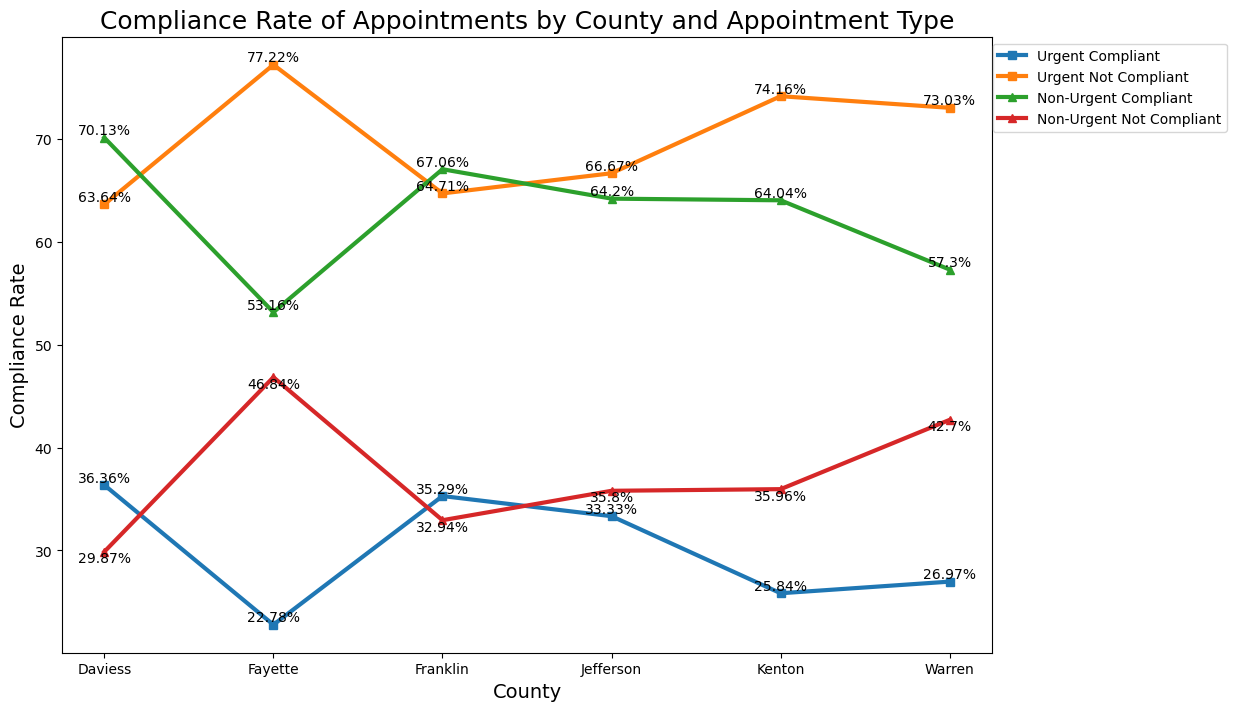

In [17]:
# Count the number of compliant and not compliant appointments by county and appointment type.
urg_compliance_counts = survey_data.groupby(['County', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()
non_urg_compliance_counts = survey_data.groupby(['County', 'Non_Urg_Appt_Status'])['Non_Urg_Appt_Status'].count().unstack()

# Calculate the percentage of compliant and not compliant appointments
urg_compliance_percentages = urg_compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)
non_urg_compliance_percentages = non_urg_compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

# Create the line graph for compliant and not compliant appointments by appointment type
plt.figure(figsize=(12,8))
plt.plot(urg_compliance_percentages.index, urg_compliance_percentages['Compliant'], label='Urgent Compliant', marker="s", linewidth=3)
plt.plot(urg_compliance_percentages.index, urg_compliance_percentages['Not Compliant'], label='Urgent Not Compliant', marker="s", linewidth=3)
plt.plot(non_urg_compliance_percentages.index, non_urg_compliance_percentages['Compliant'], label='Non-Urgent Compliant', marker="^", linewidth=3)
plt.plot(non_urg_compliance_percentages.index, non_urg_compliance_percentages['Not Compliant'], label='Non-Urgent Not Compliant', marker="^", linewidth=3)

# Add percentage labels to the data points
for i, row in urg_compliance_percentages.iterrows():
    plt.annotate(str(row['Compliant']) + '%', xy=(i, row['Compliant']), ha='center', va='bottom')
    plt.annotate(str(row['Not Compliant']) + '%', xy=(i, row['Not Compliant']), ha='center', va='bottom')
for i, row in non_urg_compliance_percentages.iterrows():
    plt.annotate(str(row['Compliant']) + '%', xy=(i, row['Compliant']), ha='center', va='bottom')
    plt.annotate(str(row['Not Compliant']) + '%', xy=(i, row['Not Compliant']), ha='center', va='top')

# Set the chart title and axis labels
plt.title('Compliance Rate of Appointments by County and Appointment Type', fontdict={'fontsize': 18})
plt.xlabel('County', fontdict={'fontsize': 14})
plt.ylabel('Compliance Rate', fontdict={'fontsize': 14})
plt.legend(loc='upper right', bbox_to_anchor=(1.26, 1))

# Show the plot
plt.show()


### Stacked Bar Chart Displaying Compliant and Not Compliant Rate for Urgent Appointment by County
In the below code:
- counting the number of **Compliant** and **Not Compliant** appointments by county for urgent appointment only.
- calculate the percentage of **Compliant** and **Not Compliant** for urgent appointment.
- create the stacked bar chart and add prercentage labels.

<Figure size 1600x800 with 0 Axes>

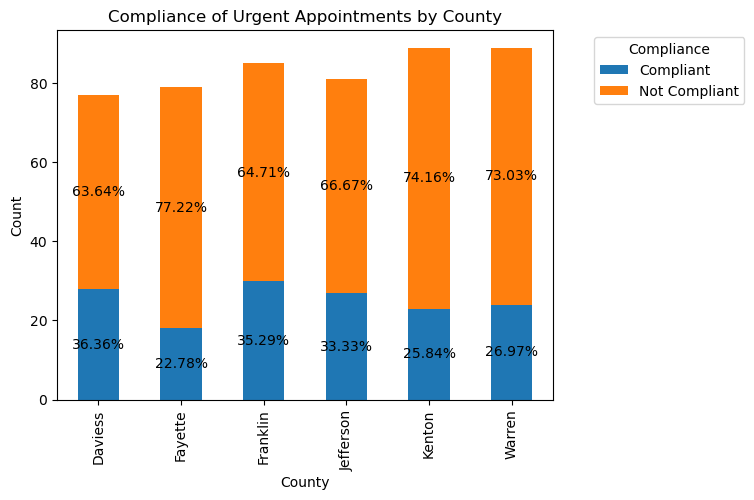

In [18]:
plt.figure(figsize=(16,8))

# Count the number of compliant and not compliant appointments by county
compliance_counts = survey_data.groupby(['County', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()

# Calculate the percentage of compliant and not compliant appointments by county
compliance_percentages = compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

# Create the stacked bar chart
compliance_counts.plot(kind='bar', stacked=True)

# Add percentage labels to the bars
for i in range(len(compliance_counts)):
    x_offset = 0
    for j in range(len(compliance_counts.columns)):
        plt.annotate(str(compliance_percentages.iloc[i, j]) + '%', xy=(i, compliance_counts.iloc[i, j] / 2 + x_offset),
                     ha='center', va='center')
        x_offset += compliance_counts.iloc[i, j]
            
            
# Set the chart title and axis labels
plt.title('Compliance of Urgent Appointments by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Compliance', loc='upper right', bbox_to_anchor=(1.40, 1))

# Set the x-axis tick labels to the county names
# plt.xticks(range(len(compliance_counts.index)), compliance_counts.index)

# Show the plot
plt.show()


## Compliance Rate by Appointment Type and Specialty
In the below code:
- counting the number of **Compliant** and **Not Compliant** appointments by specialty and appointment types.
- calculate the percentage of **Compliant** and **Not Compliant** appointments.
- create the subplots by appointment types and display **Compliant** and **Not Compliant** rate.

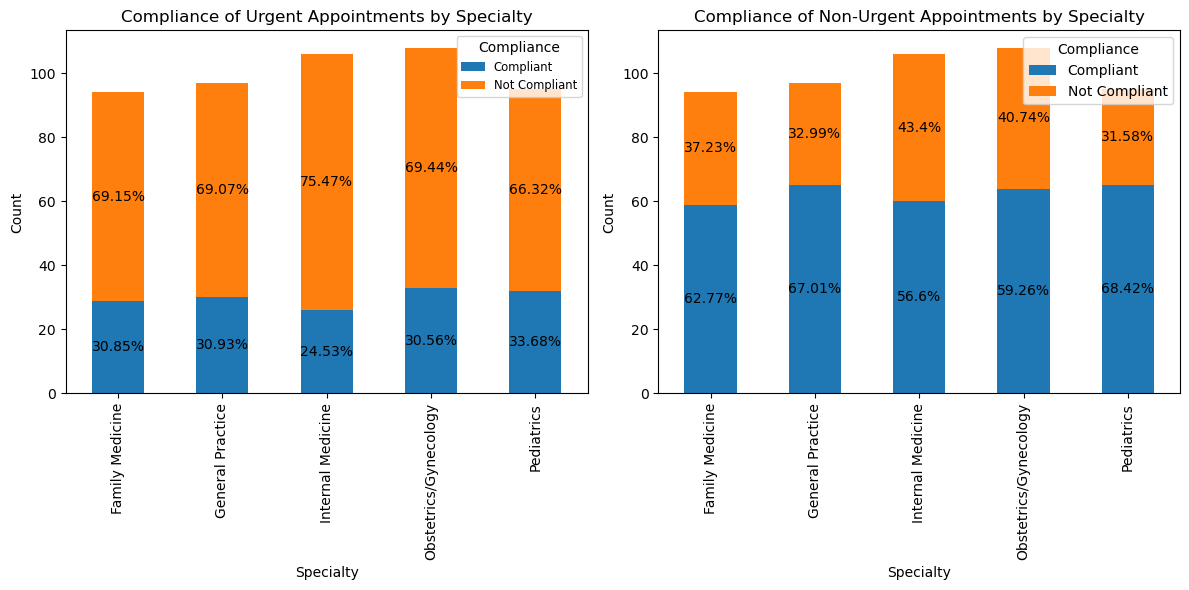

In [19]:
# Count the number of compliant and not compliant appointments by specialty and appointment type
urg_compliance_counts = survey_data.groupby(['Specialty', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()
non_urg_compliance_counts = survey_data.groupby(['Specialty', 'Non_Urg_Appt_Status'])['Non_Urg_Appt_Status'].count().unstack()

# Calculate the percentage of compliant and not compliant appointments by specialty and appointment type
urg_compliance_percentages = urg_compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)
non_urg_compliance_percentages = non_urg_compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

# Create the subplots for urgent and non-urgent appointments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bars for urgent appointments
urg_compliance_counts.plot(kind='bar', stacked=True, ax=ax1)

# Add percentage labels to the bars for urgent appointments
for i in range(len(urg_compliance_counts)):
    x_offset = 0
    for j in range(len(urg_compliance_counts.columns)):
        ax1.annotate(str(urg_compliance_percentages.iloc[i, j]) + '%', xy=(i, urg_compliance_counts.iloc[i, j] / 2 + x_offset),
                     ha='center', va='center')
        x_offset += urg_compliance_counts.iloc[i, j]

# Set the chart title and axis labels for urgent appointments
ax1.set_title('Compliance of Urgent Appointments by Specialty')
ax1.set_xlabel('Specialty')
ax1.set_ylabel('Count')
ax1.legend(title='Compliance', bbox_to_anchor=(1, 1), loc='upper right', fontsize='small')
# ax1.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

# Set the x-axis tick labels for urgent appointments
# ax1.set_xticklabels(urg_compliance_counts.index)

# Plot the bars for non-urgent appointments
non_urg_compliance_counts.plot(kind='bar', stacked=True, ax=ax2)

# Add percentage labels to the bars for non-urgent appointments
for i in range(len(non_urg_compliance_counts)):
    x_offset = 0
    for j in range(len(non_urg_compliance_counts.columns)):
        ax2.annotate(str(non_urg_compliance_percentages.iloc[i, j]) + '%', xy=(i, non_urg_compliance_counts.iloc[i, j] / 2 + x_offset),
                     ha='center', va='center')
        x_offset += non_urg_compliance_counts.iloc[i, j]

# Set the chart title and axis labels for non-urgent appointments
ax2.set_title('Compliance of Non-Urgent Appointments by Specialty')
ax2.set_xlabel('Specialty')
ax2.set_ylabel('Count')
ax2.legend(title='Compliance', loc='upper right')

# Set the x-axis tick labels for non-urgent appointments
ax2.set_xticklabels(non_urg_compliance_counts.index)

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()


# Optional Content.
## User can analyze and configure this graph based on their need.
- This is optional content created using Pygwalker.
- *Please install "pip install pygwalker" if not installed already on your computer.*
- After running the code in next line, you will see **Visualization** tab. Click on **Data** tab to change column attrubute.
- Drag and drop column names from the *Field List* to X and Y-Axis to visualize the graph.

In [20]:
df = pd.read_csv('data_provider_appt_final.csv')
gwalker = pyg.walk(df)

NameError: name 'pyg' is not defined